# Problem 3

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

## Data preparing

In [ ]:
data = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=10000)
data = pd.DataFrame(data, columns=['X1', 'X2'])
#data

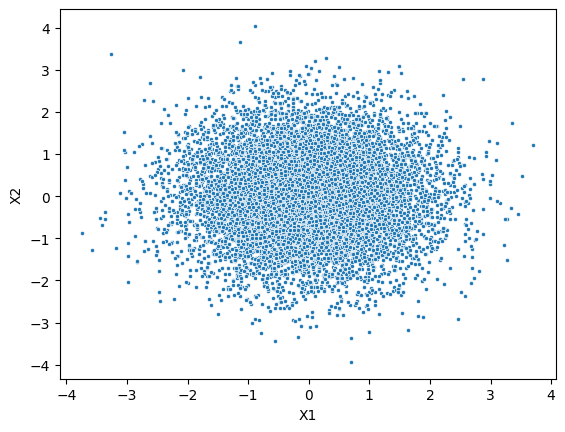

In [ ]:
sns.scatterplot(data=data, x='X1', y='X2', marker=".")
plt.show()


## Clustering

In [ ]:
k = 3
iters = list(range(1,100001))
average_norms = []

for _ in iters:
  kmeans = KMeans(n_clusters=k).fit(data)
  centroids = kmeans.cluster_centers_

  norms = np.linalg.norm(centroids, axis=1)
  print(_)
  average_norms.append(np.mean(norms))

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
95001
95002
95003
95004
95005
95006
95007
95008
95009
95010
95011
95012
95013
95014
95015
95016
95017
95018
95019
95020
95021
95022
95023
95024
95025
95026
95027
95028
95029
95030
95031
95032
95033
95034
95035
95036
95037
95038
95039
95040
95041
95042
95043
95044
95045
95046
95047
95048
95049
95050
95051
95052
95053
95054
95055
95056
95057
95058
95059
95060
95061
95062
95063
95064
95065
95066
95067
95068
95069
95070
95071
95072
95073
95074
95075
95076
95077
95078
95079
95080
95081
95082
95083
95084
95085
95086
95087
95088
95089
95090
95091
95092
95093
95094
95095
95096
95097
95098
95099
95100
95101
95102
95103
95104
95105
95106
95107
95108
95109
95110
95111
95112
95113
95114
95115
95116
95117
95118
95119
95120
95121
95122
95123
95124
95125
95126
95127
95128
95129
95130
95131
95132
95133
95134
95135
95136
95137
95138
95139
95140
95141
95142
95143
95144
95145
95146
95147
95148
95149
95150
95151
95152
95153
95154
95155
95156

## Cumultative Average

In [ ]:
average_norms = pd.DataFrame({'iters': iters, 'norms': average_norms})
average_norms["cum_avg_norms"] = average_norms["norms"].expanding().mean()
average_norms["diff"] = [average_norms['cum_avg_norms'][0]] +[abs(average_norms["cum_avg_norms"][i] - average_norms["cum_avg_norms"][i-1]) for i in range(1, len(average_norms))]


In [ ]:
average_norms

,iters,norms,cum_avg_norms,diff
0,1,1.037272,1.037272,1.037272e+00
1,2,1.036740,1.037006,2.661207e-04
2,3,1.037571,1.037194,1.882850e-04
3,4,1.036692,1.037069,1.254685e-04
4,5,1.038890,1.037433,3.643222e-04
...,...,...,...,...
99995,99996,1.036812,1.037644,8.321147e-09
99996,99997,1.037056,1.037644,5.883183e-09
99997,99998,1.039040,1.037644,1.395493e-08
99998,99999,1.036454,1.037644,1.190703e-08


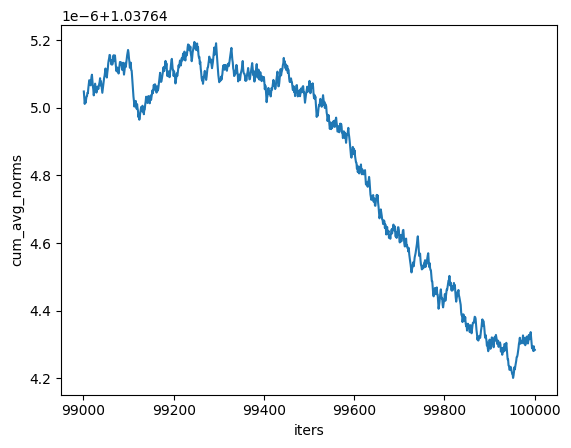

In [ ]:
sns.lineplot(data=average_norms, x='iters', y='cum_avg_norms')
plt.show()

## Optimal number of iterations

In [ ]:
average_norms.loc[average_norms['diff'] < 10e-9]

,iters,norms,cum_avg_norms,diff
975,976,1.037660,1.037651,8.730913e-09
1463,1464,1.037643,1.037650,4.385991e-09
2176,2177,1.037639,1.037642,1.361739e-09
2261,2262,1.037660,1.037642,7.622837e-09
2381,2382,1.037640,1.037655,6.091263e-09
...,...,...,...,...
99990,99991,1.038576,1.037644,9.320400e-09
99994,99995,1.038242,1.037644,5.974091e-09
99995,99996,1.036812,1.037644,8.321147e-09
99996,99997,1.037056,1.037644,5.883183e-09


In [ ]:
average_norms.loc[average_norms['diff'] < 10e-9].head(100)

,iters,norms,cum_avg_norms,diff
975,976,1.037660,1.037651,8.730913e-09
1463,1464,1.037643,1.037650,4.385991e-09
2176,2177,1.037639,1.037642,1.361739e-09
2261,2262,1.037660,1.037642,7.622837e-09
2381,2382,1.037640,1.037655,6.091263e-09
...,...,...,...,...
7058,7059,1.037635,1.037661,3.781700e-09
7063,7064,1.037729,1.037661,9.565304e-09
7093,7094,1.037727,1.037661,9.394604e-09
7104,7105,1.037642,1.037662,2.840424e-09


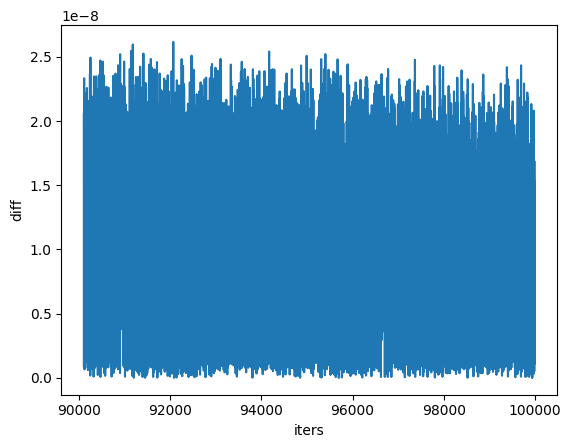

In [ ]:
sns.lineplot(data=average_norms.tail(9900), x='iters', y='diff')
plt.show()

The cumulative average stabilizes at $10^{-9}$ only after performing at least more than 100 thousand iterations. Of course, there are earlier equations of the next two cumulative means which are smaller than $10^{-8}$, however this does not mean that the cumulative means stabilize at the level of permissible error equal to $10^{-8}$.


